# Activity 6.2 : Training Neural Networks


## Name: Nicolas, Sean Julian S.
## Course/Section: CPE019-S3
## Instructor: Engr. Roman, Richard

#### Objective(s):

This activity aims to demonstrate how to train neural networks using keras

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks
* Demonstrate how to evaluate and plot the model using training and validation loss


#### Resources:
* Jupyter Notebook

CI Pima Diabetes Dataset

* pima-indians-diabetes.csv


#### Procedures

Load the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

%matplotlib inline

In [ ]:
## Import Keras objects for Deep Learning

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

Load the dataset

In [ ]:

filepath = "pima-indians-diabetes.csv"
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(filepath, names=names)

Check the top 5 samples of the data

In [ ]:

print(diabetes_df.shape)
diabetes_df.sample(5)

(768, 9)


,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
655,2,155,52,27,540,38.7,0.240,25,1
362,5,103,108,37,0,39.2,0.305,65,0
156,2,99,52,15,94,24.6,0.637,21,0
45,0,180,66,39,0,42.0,1.893,25,1
243,6,119,50,22,176,27.1,1.318,33,1


In [ ]:
diabetes_df.dtypes

times_pregnant              int64
glucose_tolerance_test      int64
blood_pressure              int64
skin_thickness              int64
insulin                     int64
bmi                       float64
pedigree_function         float64
age                         int64
has_diabetes                int64
dtype: object

In [ ]:
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

Split the data to Train, and Test (75%, 25%)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [ ]:
np.mean(y), np.mean(1-y)

(0.3489583333333333, 0.6510416666666666)

Build a single hidden layer neural network using 12 nodes.
Use the sequential model with single layer network and input shape to 8.



Normalize the data

In [ ]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

Define the model:
* Input size is 8-dimensional
* 1 hidden layer, 12 hidden nodes, sigmoid activation
* Final layer with one node and sigmoid activation (standard for binary classification)

In [ ]:

model  = Sequential([
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

View the model summary

In [ ]:

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 12)                108       
                                                                 
 dense_17 (Dense)            (None, 1)                 13        
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train the model
* Compile the model with optimizer, loss function and metrics
* Use the fit function to return the run history.


In [ ]:

model.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)


Epoch 1/200
18/18 [==============================] - 1s 42ms/step - loss: 0.7649 - accuracy: 0.4757 - val_loss: 0.7483 - val_accuracy: 0.5052
Epoch 2/200
18/18 [==============================] - 0s 4ms/step - loss: 0.7237 - accuracy: 0.5260 - val_loss: 0.7130 - val_accuracy: 0.5260
Epoch 3/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6923 - accuracy: 0.5729 - val_loss: 0.6861 - val_accuracy: 0.5625
Epoch 4/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6675 - accuracy: 0.5938 - val_loss: 0.6650 - val_accuracy: 0.5885
Epoch 5/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6476 - accuracy: 0.6181 - val_loss: 0.6482 - val_accuracy: 0.6094
Epoch 6/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6314 - accuracy: 0.6337 - val_loss: 0.6342 - val_accuracy: 0.6198
Epoch 7/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6174 - accuracy: 0.6510 - val_loss: 0.6226 - val_accuracy: 0.6250
Epoch 8/200


In [ ]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.

y_pred_class_nn_1 = np.argmax(model.predict(X_test_norm), axis=-1)
y_pred_prob_nn_1 = model.predict(X_test_norm)

6/6 [==============================] - 0s 3ms/step


In [ ]:
# Let's check out the outputs to get a feel for how keras apis work.
y_pred_class_nn_1[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
y_pred_prob_nn_1[:10]

array([[0.4678746 ],
       [0.6324667 ],
       [0.27210957],
       [0.23693542],
       [0.23107843],
       [0.56291443],
       [0.01284245],
       [0.28870746],
       [0.9291617 ],
       [0.26065215]], dtype=float32)

Create the plot_roc function

In [ ]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])



Evaluate the model performance and plot the ROC CURVE

accuracy is 0.641
roc-auc is 0.820


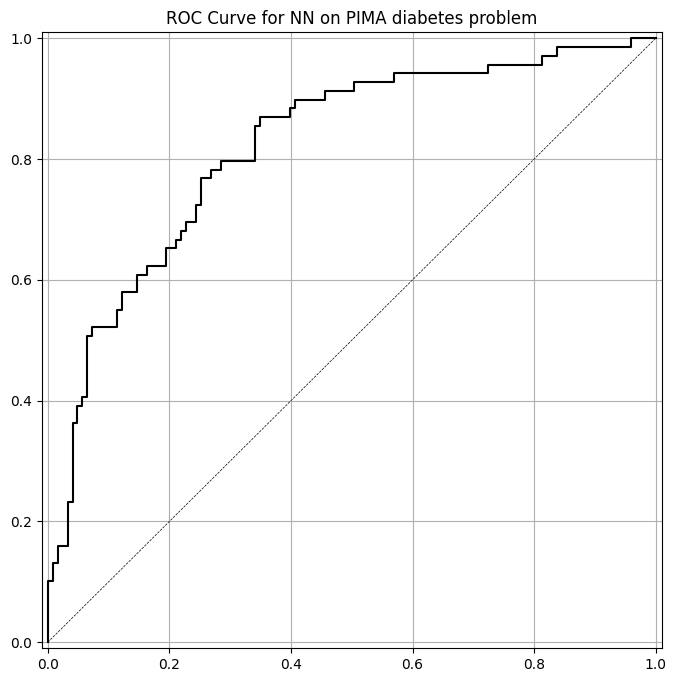

In [ ]:

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

 Plot the training loss and the validation loss over the different epochs and see how it looks

In [ ]:
run_hist_1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

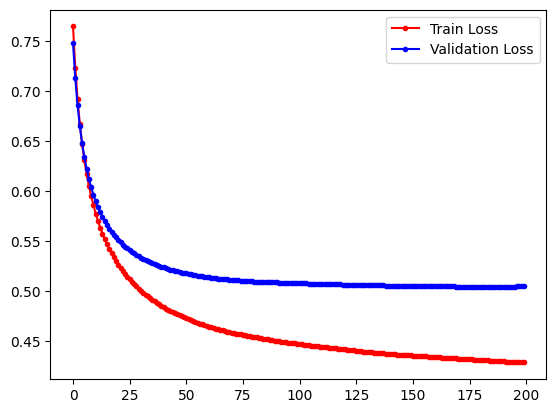

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

What is your interpretation about the result of the train and validation loss?

- Around 25 epoch, the train and validation loss started to deviate from one another with a steady decrease in train loss

#### Supplementary Activity

* Build a model with two hidden layers, each with 6 nodes
* Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
* Use a learning rate of .003 and train for 1500 epochs
* Graph the trajectory of the loss functions, accuracy on both train and test set
* Plot the roc curve for the predictions
* Use different learning rates, numbers of epochs, and network structures.
* Plot the results of training and validation loss using different learning rates, number of epocgs and network structures
* Interpret your result

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 6)                 54        
                                                                 
 dense_32 (Dense)            (None, 6)                 42        
                                                                 
 dense_33 (Dense)            (None, 1)                 7         
                                                                 
Total params: 103 (412.00 Byte)
Trainable params: 103 (412.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/1500
2/2 [==============================] - 1s 221ms/step - loss: 0.6316 - accuracy: 0.6753 - val_loss: 0.6238 - val_accuracy: 0.6979
Epoch 2/1500
2/2 [==============================] - 0s 51ms/step - loss: 0.6312 - accuracy: 0.6753 - val_loss: 0.6234 - val_accuracy: 0.6979
Epoch 3/1500
2/2 [==============================] - 0s 55ms/step - loss: 0.6308 - accuracy: 0.6753 - val_loss: 0.6230 - val_accuracy: 0.6979
Epoch 4/1500
2/2 [==============================] - 0s 55ms/step - loss: 0.6304 - accuracy: 0.6753 - val_loss: 0.6227 - val_accuracy: 0.6979
Epoch 5/1500
2/2 [==============================] - 0s 37ms/step - loss: 0.6300 - accuracy: 0.6771 - val_loss: 0.6223 - val_accuracy: 0.7031
Epoch 6/1500
2/2 [==============================] - 0s 35ms/step - loss: 0.6296 - accuracy: 0.6771 - val_loss: 0.6219 - val_accuracy: 0.7031
Epoch 7/1500
2/2 [==============================] - 0s 34ms/step - loss: 0.6292 - accuracy: 0.6771 - val_loss: 0.6215 - val_accuracy: 0.6979
Epoch 8/1500

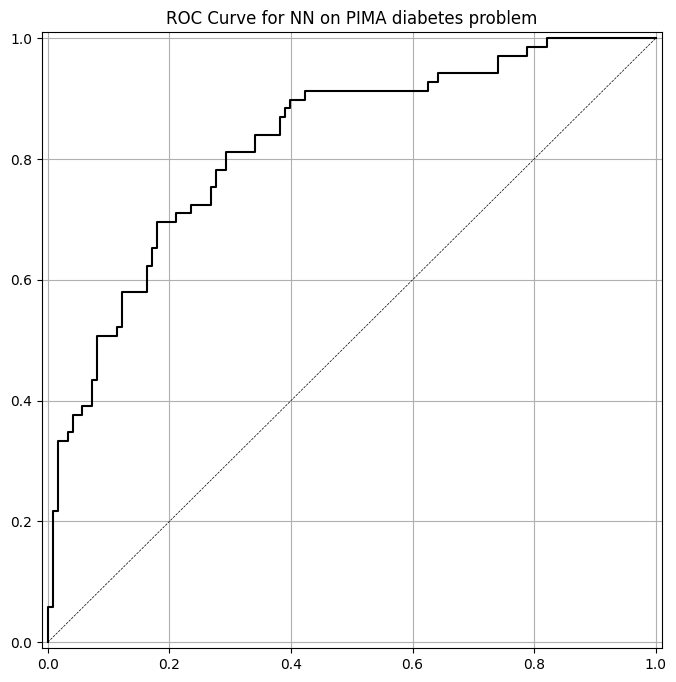

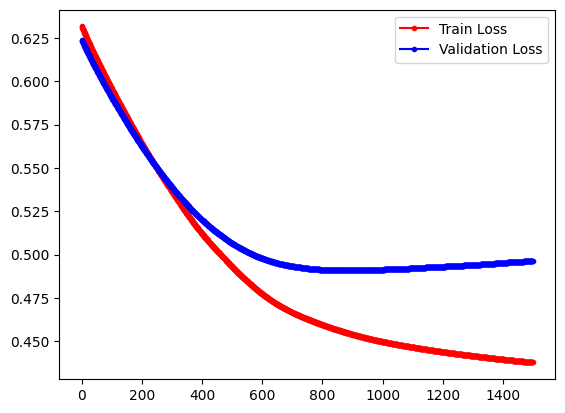

In [ ]:
# Define model
model2  = Sequential([
    Dense(6, input_shape=(8,), activation="relu"),
    Dense(6, activation='relu'),
    Dense(1, activation="sigmoid")
])

model2.summary()

# Train model
model2.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_2 = model2.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1500,batch_size=300)

y_pred_class_nn_2 = np.argmax(model2.predict(X_test_norm), axis=-1)
y_pred_prob_nn_2 = model2.predict(X_test_norm)

#Accuracy and ROC

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_2)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_2)))

#ROC plot
plot_roc(y_test, y_pred_prob_nn_2, 'NN')

run_hist_2.history.keys()

# Plot Training and Validation Loss

fig, ax = plt.subplots()
ax.plot(run_hist_2.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_2.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 6)                 54        
                                                                 
 dense_32 (Dense)            (None, 6)                 42        
                                                                 
 dense_33 (Dense)            (None, 1)                 7         
                                                                 
Total params: 103 (412.00 Byte)
Trainable params: 103 (412.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/500
2/2 [==============================] - 1s 316ms/step - loss: 0.4378 - accuracy: 0.7830 - val_loss: 0.4965 - val_accuracy: 0.7708
Epoch 2/500
2/2 [==============================] - 0s 67ms/step - loss: 0.4378 - accuracy: 0.7830 - val_loss: 0.4965 - val_accuracy: 0.7708
Epoch 3/500
2/2 [==============================] - 0s 64ms/step - loss: 0.4378 - accuracy: 0.7830 - val_loss: 0.4965 - val_accuracy: 0.7708
Epoch 4/500
2/2 [==============================] - 0s 78ms/step - loss: 0.4377 - accuracy: 0.7830 - val_loss: 0.4965 - val_accuracy: 0.7708
Epoch 5/500
2/2 [==============================] - 0s 50ms/step - loss: 0.4377 - accuracy: 0.7830 - val_loss: 0.4965 - val_accuracy: 0.7708
Epoch 6/500
2/2 [==============================] - 0s 52ms/step - loss: 0.4377 - accuracy: 0.7830 - val_loss: 0.4966 - val_accuracy: 0.7708
Epoch 7/500
2/2 [==============================] - 0s 33ms/step - loss: 0.4377 - accuracy: 0.7830 - val_loss: 0.4966 - val_accuracy: 0.7708
Epoch 8/500
2/2 [==

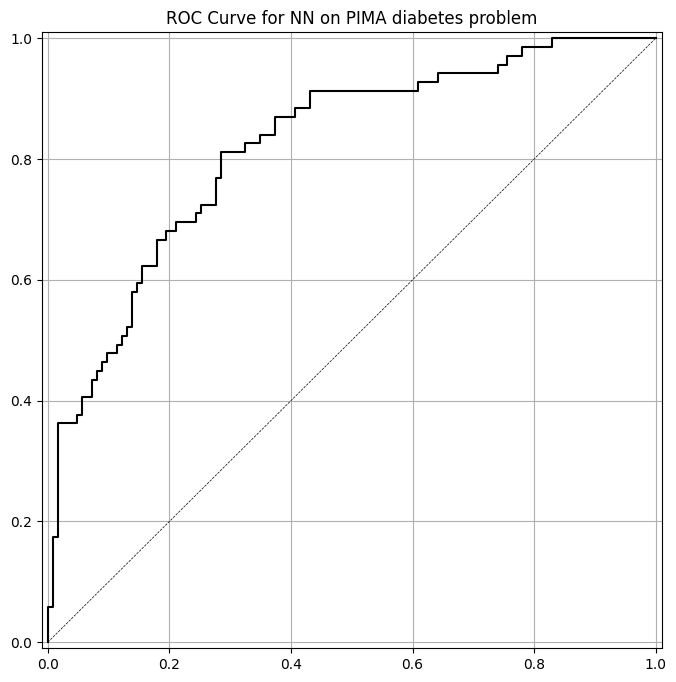

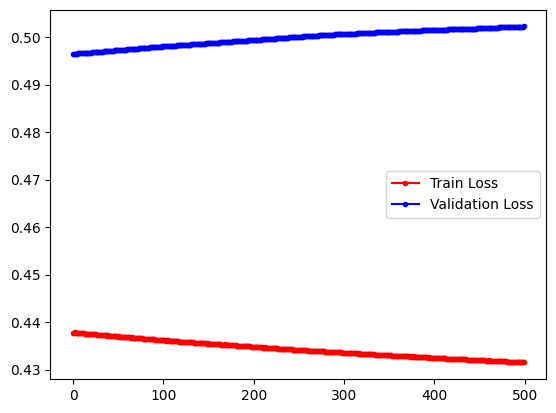

In [ ]:
# Define model
model3  = Sequential([
    Dense(6, input_shape=(8,), activation="relu"),
    Dense(24, activation='relu'),
    Dense(6, activation='relu'),
    Dense(1, activation="sigmoid")
])

model2.summary()

# Train model
model2.compile(SGD(lr = .001), "binary_crossentropy", metrics=["accuracy"])
run_hist_2 = model2.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=500,batch_size=300)

y_pred_class_nn_2 = np.argmax(model2.predict(X_test_norm), axis=-1)
y_pred_prob_nn_2 = model2.predict(X_test_norm)

#Accuracy and ROC

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_2)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_2)))

#ROC plot
plot_roc(y_test, y_pred_prob_nn_2, 'NN')

run_hist_2.history.keys()

# Plot Training and Validation Loss

fig, ax = plt.subplots()
ax.plot(run_hist_2.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_2.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 6)                 54        
                                                                 
 dense_32 (Dense)            (None, 6)                 42        
                                                                 
 dense_33 (Dense)            (None, 1)                 7         
                                                                 
Total params: 103 (412.00 Byte)
Trainable params: 103 (412.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/1500
2/2 [==============================] - 1s 233ms/step - loss: 0.4315 - accuracy: 0.7951 - val_loss: 0.5023 - val_accuracy: 0.7552
Epoch 2/1500
2/2 [==============================] - 0s 38ms/step - loss: 0.4315 - accuracy: 0.7951 - val_loss: 0.5023 - val_accuracy: 0.7552
Epoch 3/1500
2/2 [==============================] - 0s 41ms/step - loss: 0.4315 - accuracy: 0.7951 - val_loss: 0.5023 - val_accuracy: 0.7552
Epoch 4/1500
2/2 [==============================] - 0s 32ms/step - loss: 0.4314 - accuracy: 0.7951 - val_loss: 0.5023 - val_accuracy: 0.7552
Epoch 5/1500
2/2 [==============================] - 0s 33ms/step - loss: 0.4314 - accuracy: 0.7951 - val_loss: 0.5023 - val_accuracy: 0.7552
Epoch 6/1500
2/2 [==============================] - 0s 51ms/step - loss: 0.4314 - accuracy: 0.7951 - val_loss: 0.5023 - val_accuracy: 0.7552
Epoch 7/1500
2/2 [==============================] - 0s 35ms/step - loss: 0.4314 - accuracy: 0.7951 - val_loss: 0.5023 - val_accuracy: 0.7552
Epoch 8/1500

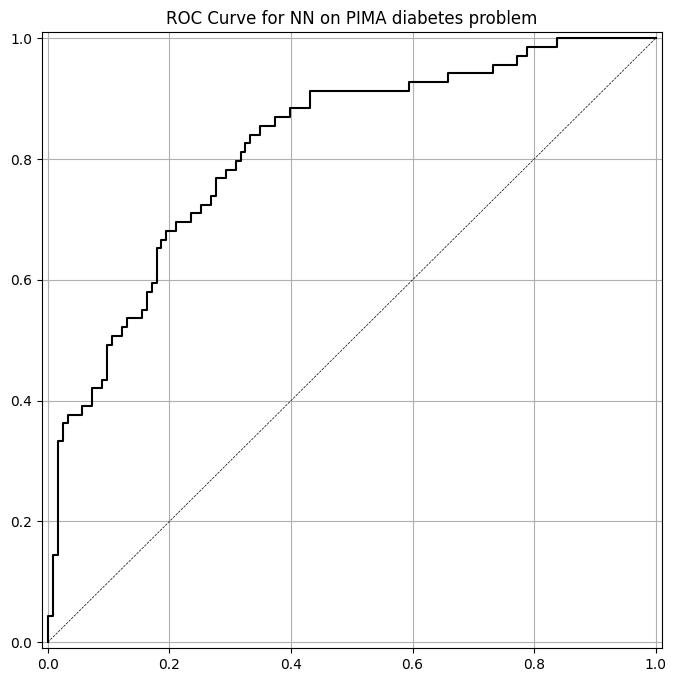

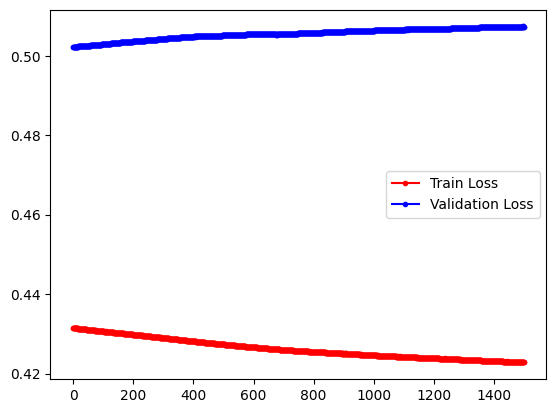

In [ ]:
# Define model
model4  = Sequential([
    Dense(6, input_shape=(8,), activation="relu"),
    Dense(12, activation='relu'),
    Dense(12, activation='relu'),
    Dense(6, activation='relu'),
    Dense(1, activation="sigmoid")
])

model2.summary()

# Train model
model2.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_2 = model2.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1500,batch_size=300)

y_pred_class_nn_2 = np.argmax(model2.predict(X_test_norm), axis=-1)
y_pred_prob_nn_2 = model2.predict(X_test_norm)

#Accuracy and ROC

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_2)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_2)))

#ROC plot
plot_roc(y_test, y_pred_prob_nn_2, 'NN')

run_hist_2.history.keys()

# Plot Training and Validation Loss

fig, ax = plt.subplots()
ax.plot(run_hist_2.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_2.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

Model 2: lr = .003, epoch = 1500 , hidden layers(nodes) = 2(6,6)

Model 3: lr = .001, epoch = 500 , hidden layers(nodes) = 2(6,6)

Model 4: lr = .003, epoch = 1500 , hidden layers(nodes) = 4(6,12,12,6)

Observation:
By comparing the result between model 2, model 3, and model 4 wherein the network structure, learning rate, and epoch was changed, it shows the same accuracy with a decrease in ROC.

#### Conclusion

In this activity I was able to demonstrate how to build and train neural networks by defining the model first and using dense to crete the layers of the network and to also evaluate and plot the model using training and validation loss. In the supplementary part of the activity, I was able to experiment on the values of epoch, learning rate, and the structure of the network in order to observe its output. I observed that the value of the ROC changed only slightly.